# 05. / 06. TP Regression

#### enseignant: Anastasios Giovanidis 2021 - 2022
#### date: 13 Octobre 2021 and 20 Octobre 2021

#### student name or binome:

This is the TP related to regression. We will need to import the following libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

We will work with linear models of the form 

$y = \beta_0+\beta_1 x + \epsilon$. 

In the following, the random error $\epsilon$ gets a Normal distribution $\mathcal{N}(0,\sigma^2)$, where $\sigma$ is the standard deviation. It is independent of $x$ and every realisation is i.i.d. We remind that $Var(\epsilon)=\sigma^2$.

As a means of example let us consider the linear model $y=b_0+b_1x+\epsilon$, with $b_0=2$ and $b_1=3$. Also let the noise standard deviation be $\sigma=30$. (Note that: at the end of the example, you can change these values to your own choice)

$y(x)$ is what we measure, when the single feature takes value $x$. 

The sample size is $n$.

In [3]:
n = 20 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3]) # real slope (unobserved)

## Preparation: Generating "synthetic" data

In [4]:
# For the Error Vector we need to define:
mue, sigmae = 0, 30 # error mean and standard deviation
# If you want to fix a 'random' vector and not have different vectors per call, then use:
np.random.seed(199)
Er = np.random.normal(mue, sigmae, n)

In [5]:
print(Er)

[ 33.24214448  -9.66833454  68.66231565 -55.3634741  -46.02241369
  32.69834474  36.28414203  -8.77906033 -28.89190806   6.07129635
  48.70306245 -69.33409712  31.09989668  70.21805685  -6.69218164
 -19.60951679  24.44625946 -12.92376476  -0.37686216  39.06455214]


We suppose that the feature input $x$ ranges within an interval $\left[x_l,x_h\right]$. The $n$ values of $x$ are chosen uniformly randomly within the interval as a means of simulation.

In [6]:
xl, xh = 0, 120
np.random.seed(199)
x = np.random.uniform(xl,xh,n)
print(x)

[ 78.57500336 117.84471417  47.98856377 101.29831222  55.66108205
  65.38116798  74.337341    39.82041465 117.71944956  31.32134616
 112.80089673   5.39719021  50.41908488  99.59823395  69.68557585
  13.90856407  13.01791564 107.00400554  53.31687507  64.69449614]


Having prepared the n-sized vectors Er, and x, we can now find the 'real' values of the response $y$.

In [7]:
y = b0+b1[0]*x+Er
print(y)

[270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]


Let us plot the line $2+3*x$ as well as the generated points $y$ that include the error.

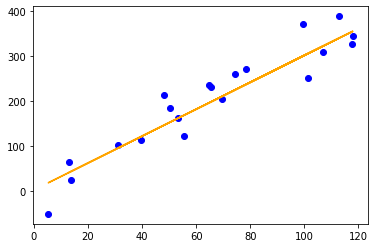

In [8]:
plt.plot(x,y,'o',color='blue')
plt.plot(x,b0+b1*x,color='orange')

The Sample generator is written in what follows as a function, to be called at later stages. When the seed = seedit takes an integer value, the random vectors do not change on each call. By letting seed = () the random vectors $x,y,Er$ change on each call. The parameter size determines the size of vector $x$ i.e. the number of different features included (if $size>1$ then the model is multi-linear).

In [9]:
def genSample(n,b0,b1,sigmae,xLow,xHigh,seedit=199,size=1):
    if type(seedit)==int:
        np.random.seed(seedit)
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed(seedit+k)
            x.append(np.random.uniform(xl,xh,n))
    else:
        np.random.seed()
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed()
            x.append(np.random.uniform(xl,xh,n))
    y = b0+Er
    for k in range(size):
        y +=b1[k]*x[k]
    #
    # Output
    if size==1:
        return (x[0], y, Er)
    else:
        return (x, y, Er)

In [10]:
n, b0, b1 = 20, 2, np.array([3]) 
(x,y,Er) = genSample(n,b0,b1,sigmae,xl,xh,seedit=199,size=1)
print(y)

[270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]


One can also put the $x,Er,y$ vectors in a panda table.

In [11]:
bob = {'x': x, 'error': Er, 'y': y}
df_slr = pd.DataFrame(data=bob)
df_slr

,x,error,y
0,78.575003,33.242144,270.967155
1,117.844714,-9.668335,345.865808
2,47.988564,68.662316,214.628007
3,101.298312,-55.363474,250.531463
4,55.661082,-46.022414,122.960832
5,65.381168,32.698345,230.841849
6,74.337341,36.284142,261.296165
7,39.820415,-8.779060,112.682184
8,117.719450,-28.891908,326.266441
9,31.321346,6.071296,102.035335


## Exercise 1

### **Part A.** 
With the above synthetic data: 
* a) Compute the sample means $\bar{x}$, $\bar{y}$, and the sample variance $s_{xx}$ and covariance $s_{xy}$ .

* b) Find the coefficient estimates for the least-squares line $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$, using the formulas presented in the course. Compare these with the unobserved real values of $(\beta_0,\beta_1)=(2,3)$. What do you observe?

* c) Plot the regression line, least-squares line and the data samples.

You can work with either numpy or pandas.

You can compare your results with the ones from the **Simple Linear Regression using scikit-learn** that follows.

**Note** For numpy commands:

- Command x.var() in numpy has by default 'ddof=0', so that the denominator is 'n' (Population Statistic). To change this to sample variance, one needs to set the parameter 'ddof=1', i.e. Sxx = x.var(ddof=1).

- Command cov(x,y) in numpy has by default 'ddof=1', so that the denominator is 'n-1' (Sample Statistic). To change this to population covariance one needs to set the parameter 'ddof=0', i.e. Sxy = np.cov(x,y,ddof=0).

**Answer 1.A** 

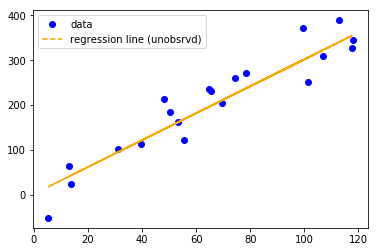

In [15]:
#Answer 1.c
plt.plot(x,y,'o',color='blue',label='data')
plt.plot(x,b0+b1[0]*x,'--',color='orange',label='regression line (unobsrvd)')
# UNCOMMENT THE LINE BELOW!
#plt.plot(x,b0_est+b1_est*x,color='green',label='least-squares')
plt.legend(loc=2)

### **Part B. (Accuracy)** 
You can now evaluate the accuracy of your prediction, using the following metrics:

* d) Evaluate the Residual Standard Error (RSE) and the Mean Squared Error (MSE). 
What do they tell about the accuracy of the model?

**Note:** The Mean Squared Error (MSE) can be calculated as $MSE := \frac{1}{n}RSS = \frac{n-2}{n}RSE^2$.

* e) Evaluate the $R^2$-statistic. 
What does it tell about the accuracy of the model?
* f) Determine the $95\%$ confidence intervals for the coefficients. 
Do the real coefficients $\beta_0$ and $\beta_1$ fall in the calculated intervals?

(again) You can compare your results with the ones from the **Simple Linear Regression using scikit-learn** that follows.

**Answer 1.B** 

### Simple Linear Regression using scikit-learn

We need to import appropriate libraries from sklearn.

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
x1 = x
# if x only 1 dimension then we need to add axis
if len(np.shape(x1))==1:
    x_sc = x1[:,np.newaxis]
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_sc,y)
# Make predictions using the same x set
y_pred = regr.predict(x_sc)

In [14]:
# The coefficient $\beta_1$
print('Slope: %.2f' % regr.coef_)
# The intercept $\beta_0$
print('Intercept: %.2f' % regr.intercept_)

Slope: 3.15
Intercept: -1.05


In [15]:
# The mean squared error
print("Mean_squared_error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
r2n = r2_score(y, y_pred)
print('R2_score: %.2f' % r2n)

Mean_squared_error: 1441.63
R2_score: 0.89


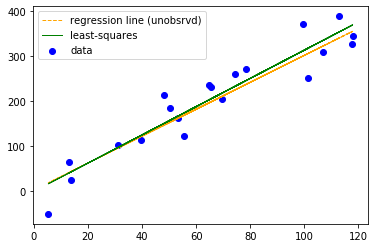

In [16]:
# Plot outputs
f = plt.figure()
plt.scatter(x, y,  color='blue',label='data')
plt.plot(x, b0+b1[0]*x,'--', color='orange', linewidth=1, label='regression line (unobsrvd)')
plt.plot(x, y_pred, color='green', linewidth=1, label='least-squares')

plt.legend(loc=2)

plt.show()
# Export as pdf
#f.savefig("LinearRegression.eps", format='eps',bbox_inches='tight')

### Simple Linear Regression using statsmodels

In [16]:
import statsmodels.api as sm

**Note:** Statsmodels does not has as default the calculation of a constant bias.
Uses OLS = Ordinary Least Squares

In [17]:
# using pandas
X = df_slr["x"]
y = df_slr["y"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
y_pred_OLS = model.predict(X) # make the predictions using SAME train data

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           4.29e-10
Time:                        12:17:25   Log-Likelihood:                -101.11
No. Observations:                  20   AIC:                             206.2
Df Residuals:                      18   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0524     19.328     -0.054      0.957     -41.658      39.553
x              3.1469      0.260     12.122      0.000       2.602       3.692
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   2.484
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.845
Skew:                          -0.199   Prob(JB):                        0.656
Kurtosis:                       2.075   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note:** We observe the same estimates for intercept $\hat{\beta}_0$ named 'const coef', slope $\hat{\beta}_1$ named 'x coef', $R^2$-statistic named 'R-squared'.

## Exercise 2

The following Dataset related to advertisement is given in pandas and numpy format:

**Download the Advertising.csv dataset from the link:**

https://www.statlearning.com/resources-first-edition

In [25]:
directory = #YOUR DIRECTORY HERE
prefix = "Advertising.csv"
filename1 = directory+prefix
dataAd = np.loadtxt(filename1, delimiter=",",skiprows=1,usecols=[1,2,3,4])

In [26]:
# pandas
pdAd = pd.DataFrame(dataAd, columns=["TV","radio","newspaper","sales"])

In [59]:
# numpy
TV = pdAd.iloc[:,0].values
radio = pdAd.iloc[:,1].values
news = pdAd.iloc[:,2].values
sales = pdAd.iloc[:,3].values

- Perform simple linear regression between all pairs x-y, where y=sales. For this you need to use (a) scikit-learn tools, and (b) statsmodels. Compare the results and plot the regression lines and data points. Especially, check how much is the $R^2$ measure per feature, to understand how much of the output $y$ is explained per feature.

- Compare the values of the slopes from the 3 simple linear regressions, with the slopes from a multi-linear regression that includes all 3 features. Find the $R^2$ from the multi-dimensional model, and compare it with the above values. What do you observe?

**Answer**

## Exercise 3 (Sample size & Error Variance)

In this example we will study the influence of sample size $n$ and the influence of error variance on the quality of the regression.

* If the initial value for the sample size was $n$, choose $n_{new} = 2n$, so that the new sample includes the $n$ initial samples and $n$ new ones. Set $n=20$ as before. What do you observe about the quality of the prediction? ($R^2$-statistic)

* What happens when the Error standard deviation is doubled? tripled?

You can use the given function for synthetic data generator.

**Note:** Normally, for small n_plus we need to average out many random realisations to see the improvement.

**Answer** 

## Exercise 4 (Unbiased Estimators) - bonus

Use $L=15$ different samples of size $n=20$, with error $sigmae = 50$. Repeat the regression process and plot all least-squares curves, on the same plot. What do you observe? (for more emphasis, choose larger $sigmae$, e.g. double or triple). 

Take care to save the coefficients of each iteration for further use.

With this, average over the $L$ values of each coefficient and draw the average curve. Compare this curve with the orginal regression line $\beta_0+\beta_1x$. What can you see? If you increase $L$ what happens to the average curve?

**Answer:** 

## Exercise 5 (Multiple Linear Regression)

We will now work on problems of multi-linear regression. The regression plane (>2 dimensions) is given by the following expression, for $k=4$ features:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \epsilon$.

First create synthetic data for $(x_1,x_2,x_3,y,Er)$. Let $x_4=np.ones(n)+Er$, hence a variable that does not influence $y$.

* (a) For the above multi-regression model, estimate the unknown coefficients $(\beta_0,...,\beta_4)$. Determine the F-statistic, $R^2$ and the p-values for the four features.

* (b) Use a multi-regression model only for $(x_2,x_4)$. Estimate the coefficients, and determine the F-statistic, $R^2$ and the p-values for the two features. How does $p-$ and $F-$ compare with (a)? What does this imply?

* (c) Use $4$ single-regression models, one for each variable $x_i$. How do the estimated slopes $\beta_1$, $\ldots$, $\beta_4$ compare with the estimated slopes you get using multi-regression in (a)?

Compare the answers for cases (a), (b), (c). What do you observe? Explain.


**Note 1** Use scikit-learn and create a linear regression object.

**Note 2** For the p-values and the F-statistic, you can use the scikit-learn command
sklearn.feature_selection.f_regression

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

### Synthetic data creation

In [19]:
n = 100 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3, 7, 20]) # real slope (unobserved)
xl, xh = 0, 120
sigmae = 30 # error mean and standard deviation

In [20]:
(xM,yM,ErM) = genSample(n,b0,b1,sigmae,xl,xh,seedit=199,size=len(b1))
x_extra = 1+ErM
xM.append(x_extra)
yM += xM[-1]

Data Visualisation

In [21]:
dataM = {'x1': xM[0], 'x2' : xM[1],'x3' : xM[2] ,'x4': xM[3], 'error': ErM, 'y_mult': yM}
df_slrM = pd.DataFrame(data=dataM)
#df_slrM

**Answer**

(Here I will just show the question (a) using statsmodels, you need to do it with scikit-learn.)

In [22]:
# using pandas
Xm = df_slrM[["x1", "x2", "x3", "x4"]]
Ym = df_slrM["y_mult"]
Xm = sm.add_constant(Xm) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Ym, Xm).fit()
y_pred_OLS = model.predict(Xm) # make the predictions using SAME train data

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_mult   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.563e+31
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:19:59   Log-Likelihood:                 2680.5
No. Observations:                 100   AIC:                            -5351.
Df Residuals:                      95   BIC:                            -5338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.78e-13   5.63e+12      0.000       1.000       1.000
x1             3.0000   1.65e-15   1.82e+15      0.000       3.000       3.000
x2             7.0000   1.57e-15   4.47e+15      0.000       7.000       7.000
x3            20.0000   1.61e-15   1.24e+16      0.000      20.000      20.000
x4             2.0000   1.91e-15   1.05e+15      0.000       2.000       2.000
==============================================================================
Omnibus:                        5.179   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                2.835
Skew:                           0.172   Prob(JB):                        0.242
Kurtosis:                       2.250   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do the same using scikit-learn.

### The END.